# Prof D’s Regression Sessions - Vol 2

AKA - Multiple Regression

## Preamble

We’re going even deeper this week in Volume 2 of the Regression
Sessions, so to help you along on your journey we have got Volume 2 of
the Progression Sessions with Blame and DRS - Enjoy!

## Introduction

Similar to last week’s practical, we will continue our investigation
into the factors that affect school-level attainment figures, following
the lecture you have just seen.

Last week, you created a data subset for England of some 30-odd
variables related to different measures of attainment, and a selection
of continuous and categorical variables which might help explain those
attainment levels. This week we will use more of those variables to
build a multiple regression model and evaluate its outputs.

Building a good regression model can be as much art as it is science!
Back to our cake baking analogy last week - think of it a bit like the
bake-off ‘technical challenge’ - same recipe, same ingredients,
potentially some very different outcomes!

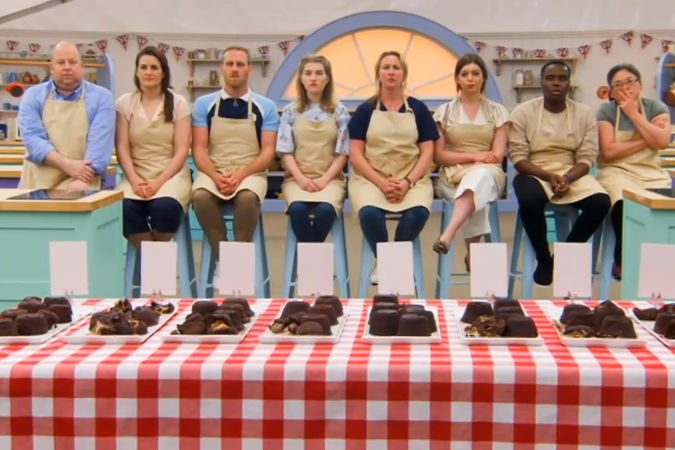

It takes a lot of practice, iteration and understanding of the various
dimensions in your model to build a good regression model. It is
**much** more than just a good R-squared and some ‘statistically
significant’ coefficients!

## Aims

By the end of this week’s regression session you should:

-   Consolidate your knowledge of using R or Python to process data in
    order to carry out a scientific investigation
-   Build on the skills learned last week to practice further plotting
    and visualising of data to assess relationships between multiple x
    variables and a selected y variable
-   Refresh your knowledge of using built-in statistical software
    functions in R and Python to run some more sophisticated regression
    models and produce statistical outputs from those models
-   Practice interpreting the outputs of those models thinking in
    particular about issues of confounding, mediating, multicollinearity
    and the independence of residuals
-   Practice experimenting with interaction effects in your model and
    the interpretation of those outputs

> **Note**
>
> As with last week’s practical you will find code-blocks that will
> allow you to run your analysis in either R or Python. Again, it’s up
> to you which you decide to use.

## Tasks

This week we won’t look at individual local authorities, but will focus
on the whole of England.

### 1. Baseline Model

-   Run your baseline bivariate, whole of England, regression model from
    last week

### 2. Data Prep and Exploratory Data Analysis

-   Prepare your data and carry out some exploratory data analysis to
    understand what you are working with

### 3. Multiple Regression Model

-   Experiment with adding additional explanatory variables one-by-one
    into your model - both continuous and categorical. You might even
    experiment with reclassifying variables to reduce any noise that
    might exist with excessive categories unclear continuous
    relationships
-   Try to find the model that best explains your attainment variable.
    One that strikes a good balance between:
    -   explanatory power (a good $R^2$, significant explanatory
        variables) - best doesn’t necessarily mean the highest $R^2$, if
        a variable with more nuance allows you to say something more
        interesting about a relationship.
    -   parsimony (the principle of simplicity - fewest variables,
        simplest possible explanation)

### 4. Evaluation

-   When you have your ‘best’ model, how do you interpret the
    coefficients?
    -   Which variable(s) has(have) the most explanatory power (check
        t-values for this)?
    -   How do you interpret the combined explanatory power of variables
        in your model?
    -   What kind of confounding do you observe as you add more
        variables (if any)?
    -   Do you have any issues of multicollinearity or residual
        independence? Does your model pass the standard tests?

### 5. Interaction Effects

-   Experiment with interacting some of the variables in your best
    multiple regression model and see if this adds any more explanatory
    nuance to your main analysis

### 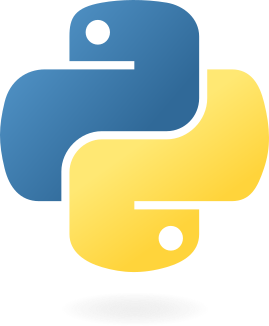

## Task 1 - Baseline Model

-   First read in your data file from last week and run your final
    baseline model from last week
-   Then run a basic bivariate regression model for your attainment
    variable of choice (I am using raw Attainment 8 scores -
    **ATT8SCR** - , but last week you should have chosen one of the
    other different Attainment scores to try and model - therefore you
    will need to adjust your code accordingly)
-   Your choice of independent variable can be anything, but you might
    want to start with **PTFSM6CLA1A (% of pupils at the end of key
    stage 4 who are disadvantaged)** as I am.
-   Don’t forget, you probably will want to log-transform both of your
    variables

> **Note**
>
> The paths in the code below are specific to my home computer - you’ll
> need to adapt this code to read the csv from where it is on your
> computer.
>
> And one more reminder - you will also need to change the variables to
> the ones you used last week - don’t just copy mine!

### 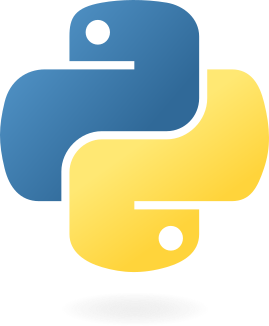

In [ ]:
import pandas as pd
import numpy as np
import janitor
from pathlib import Path
import statsmodels.api as sm

# little function to define the file root on different machines
def find_qm_root(start_path: Path = Path.cwd(), anchor: str = "QM") -> Path:
    """
    Traverse up from the start_path until the anchor folder (e.g. 'QM' or 'QM_Fork')      is found. Returns the path to the anchor folder.
    """
    for parent in [start_path] + list(start_path.parents):
        if parent.name == anchor:
            return parent
    raise FileNotFoundError(f"Anchor folder '{anchor}' not found in path      hierarchy.")
  
qm_root = find_qm_root()
base_path = qm_root / "sessions" / "L6_data" / "Performancetables_130242" / "2022-2023"
na_all = ["", "NA", "SUPP", "NP", "NE", "SP", "SN", "LOWCOV", "NEW", "SUPPMAT", "NaN"]

england_filtered = pd.read_csv(base_path / "england_filtered.csv", na_values=na_all, dtype={"URN": str})

# Log-transform safely: replace non-positive values with NaN
england_filtered['log_ATT8SCR'] = np.where(england_filtered['ATT8SCR'] > 0, np.log(england_filtered['ATT8SCR']), np.nan)
england_filtered['log_PTFSM6CLA1A'] = np.where(england_filtered['PTFSM6CLA1A'] > 0, np.log(england_filtered['PTFSM6CLA1A']), np.nan)

# Drop rows with NaNs in either column
england_filtered_clean = england_filtered.dropna(subset=['log_ATT8SCR', 'log_PTFSM6CLA1A'])

# Define independent and dependent variables
X = sm.add_constant(england_filtered_clean['log_PTFSM6CLA1A'])  # adds intercept
y = england_filtered_clean['log_ATT8SCR']

# Fit the model
england_model1 = sm.OLS(y, X).fit()
#england_summary = extract_model_summary(england_model1, 'England Model')

# Print summary
print(england_model1.summary())

                            OLS Regression Results                            
Dep. Variable:            log_ATT8SCR   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     2611.
Date:                Sat, 25 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:10:09   Log-Likelihood:                 1668.0
No. Observations:                2968   AIC:                            -3332.
Df Residuals:                    2966   BIC:                            -3320.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.4778      0.013    3

## Task 2 - Exploratory Analysis and Data Preparation

-   Right, we that was a nice and simple starter. We now have a baseline
    and something to compare your subsequent more sophisticated models
    to.
-   These next steps will be a little trickier and I will be expecting
    you to use some of the knowledge gained last week to complete the
    tasks, rather than me giving you all of the right code explicitly.

### 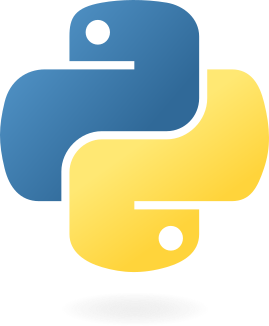

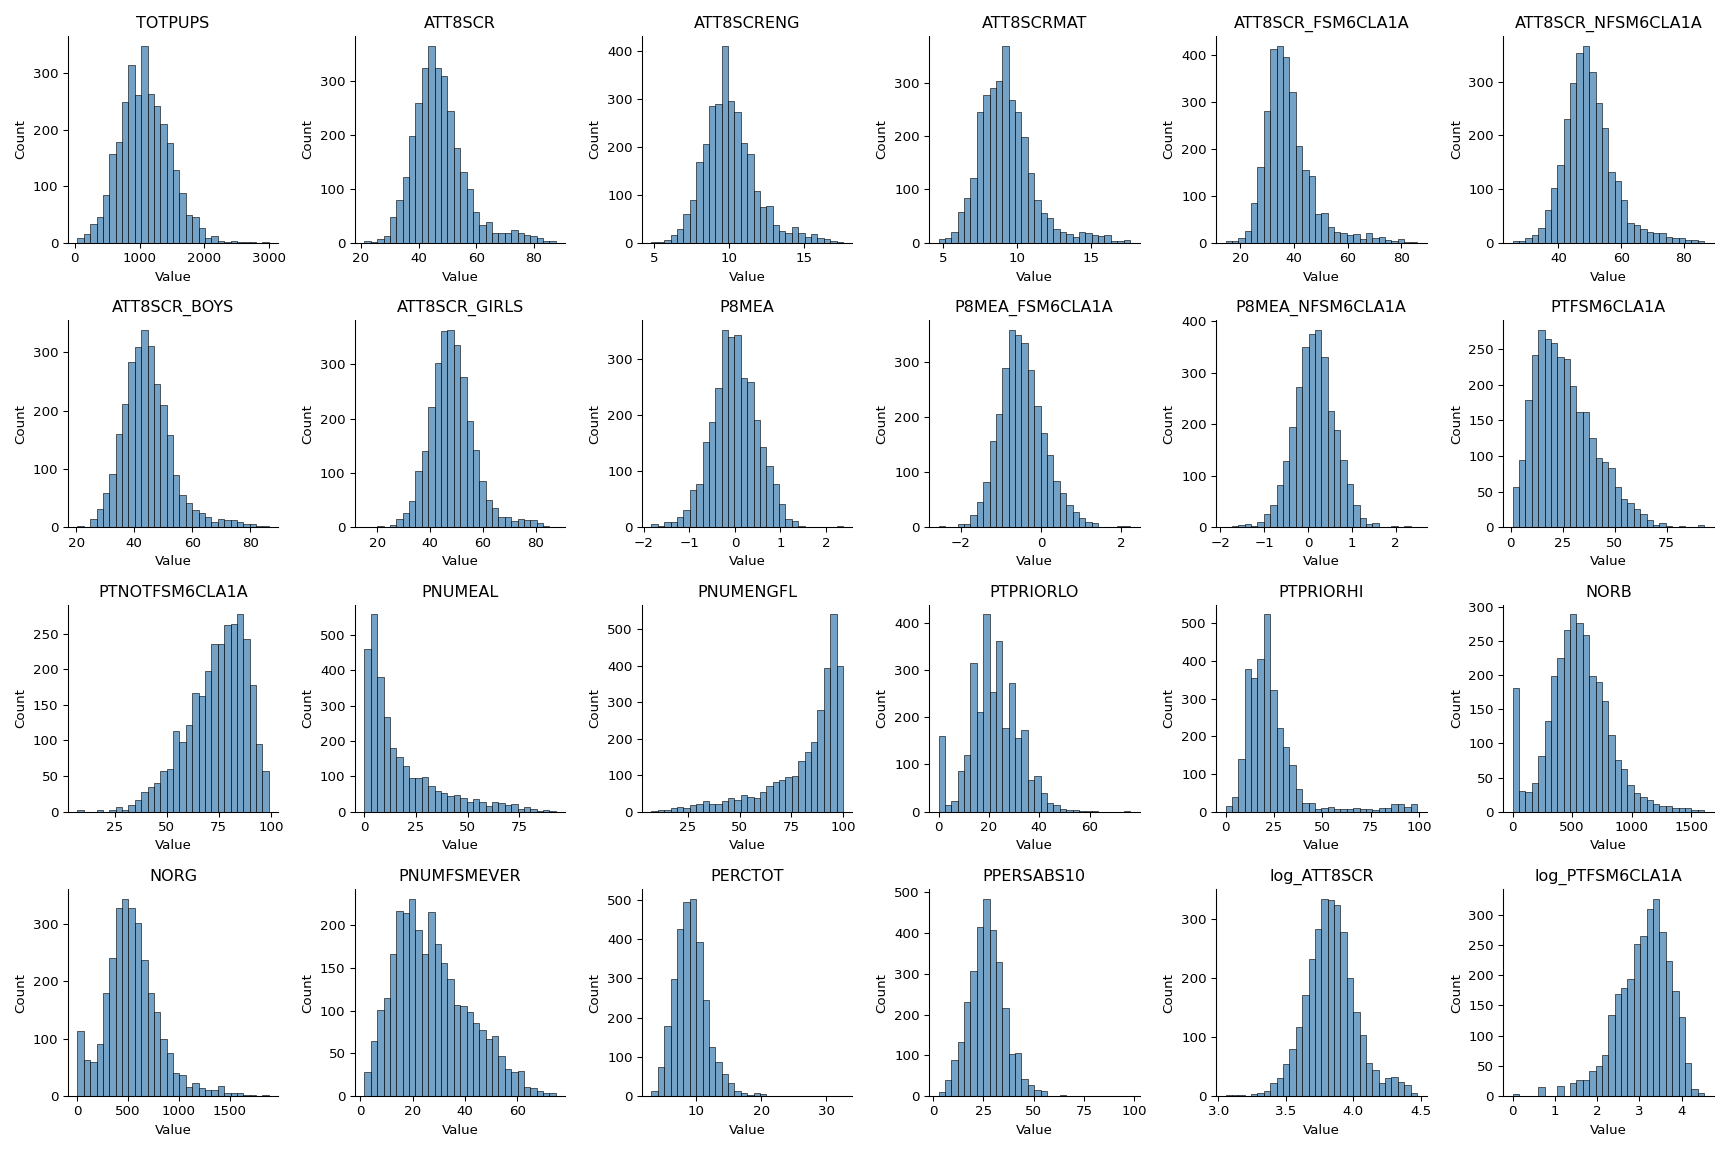

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop unwanted numeric columns
numeric_cols = england_filtered_clean.drop(columns=['easting', 'northing', 'LEA'], errors='ignore').select_dtypes(include='number')

# Convert to long format
numeric_long = numeric_cols.melt(var_name='variable', value_name='value')

# Set up the figure
variables = numeric_long['variable'].unique()
n_vars = len(variables)
cols = 6
rows = (n_vars + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, 3 * rows))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.histplot(data=numeric_long[numeric_long['variable'] == var], x='value', bins=30, color='steelblue', ax=axes[i])
    axes[i].set_title(var)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Count")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Histograms of Numerical Variables", y=1.02)
sns.despine()
plt.show()

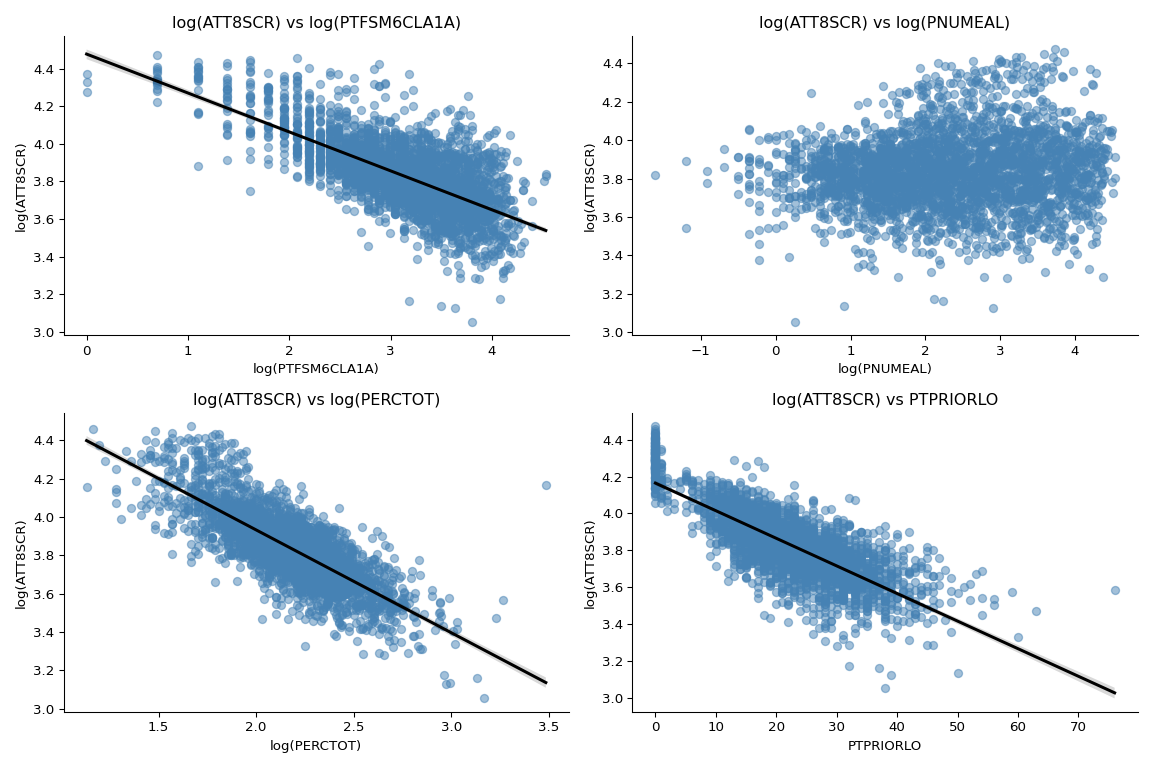

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Log-transform relevant variables
england_filtered_clean['log_ATT8SCR'] = np.log(england_filtered_clean['ATT8SCR'])
england_filtered_clean['log_PTFSM6CLA1A'] = np.log(england_filtered_clean['PTFSM6CLA1A'])
england_filtered_clean['log_PNUMEAL'] = np.log(england_filtered_clean['PNUMEAL'])
england_filtered_clean['log_PERCTOT'] = np.log(england_filtered_clean['PERCTOT'])

# Prepare long format data
long_df = pd.melt(
    england_filtered_clean,
    id_vars=['log_ATT8SCR'],
    value_vars=['log_PTFSM6CLA1A', 'log_PNUMEAL', 'log_PERCTOT', 'PTPRIORLO'],
    var_name='predictor',
    value_name='x_value'
)

# Custom axis labels
axis_labels = {
    'log_PTFSM6CLA1A': 'log(PTFSM6CLA1A)',
    'log_PNUMEAL': 'log(PNUMEAL)',
    'log_PERCTOT': 'log(PERCTOT)',
    'PTPRIORLO': 'PTPRIORLO'
}

# Set up the figure manually
predictors = long_df['predictor'].unique()
cols = 2
rows = (len(predictors) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
axes = axes.flatten()

for i, predictor in enumerate(predictors):
    subset = long_df[long_df['predictor'] == predictor]
    sns.regplot(
        data=subset,
        x='x_value',
        y='log_ATT8SCR',
        scatter_kws={'alpha': 0.5, 'color': 'steelblue'},
        line_kws={'color': 'black'},
        ax=axes[i]
    )
    axes[i].set_title(f"log(ATT8SCR) vs {axis_labels[predictor]}")
    axes[i].set_xlabel(axis_labels[predictor])
    axes[i].set_ylabel("log(ATT8SCR)")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Scatter Plots of log(ATT8SCR) vs Predictors", y=1.02)
sns.despine()
plt.show()

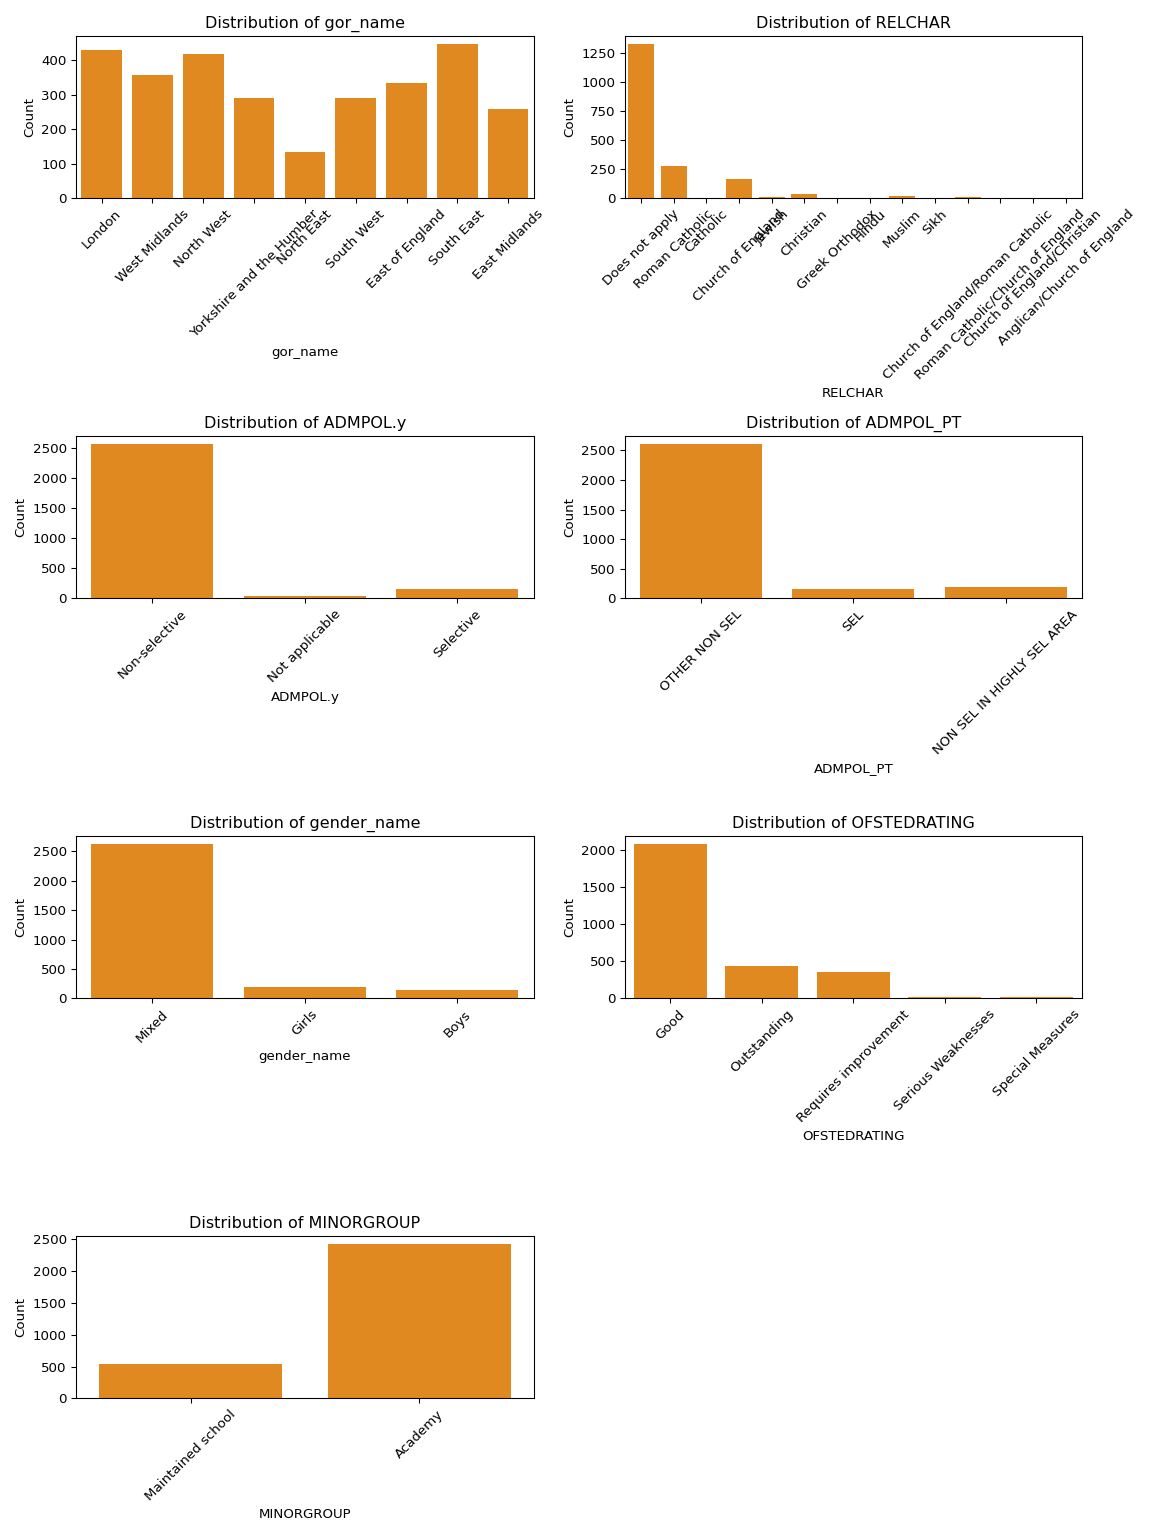

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select categorical columns and drop unwanted ones
categorical_cols = england_filtered_clean.select_dtypes(include='object').drop(
    columns=['URN', 'SCHNAME.x', 'LANAME', 'TOWN.x', 'SCHOOLTYPE.x'], errors='ignore'
)

# Determine layout
n_cols = 2
n_rows = (len(categorical_cols.columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

# Generate bar plots
for i, colname in enumerate(categorical_cols.columns):
    sns.countplot(data=categorical_cols, x=colname, ax=axes[i], color='darkorange')
    axes[i].set_title(f"Distribution of {colname}")
    axes[i].set_xlabel(colname)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Changing your dummy reference category

Your dummy variable reference category is the category within the
variable that all other categories will be compared against in your
model.

While the reference category has no effect on the model itself, it does
make a difference for how you interpret your model.

For example, if you are using Regions in England as a dummy, setting
your reference region as London will mean all other regions are compared
to it and they might naturally be lower or higher.

A good strategy is to select the most or least numerous or important
category in your variable, rather than something in the middle. Of
course, you may not know which is most important until you run your
model, so you may need to go back and reset the reference variable and
run the model again.

Here is some code in R and Python to help you carry out the setting of
the reference level (Yes, it’s more straightforward in R!)

### 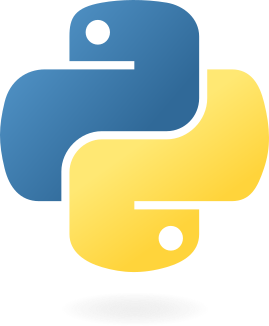

### Reclassifying a variable into fewer categories

As mentioned in the lecture, it can sometimes be useful to reclassify a
variable into fewer categories to see if a signal appears.

Let’s have a look at the religious character of a school variable and
test it out as dummy in a basic model:

Note the Python code is far more complicated than the R code, but should
prodice similar outputs

### 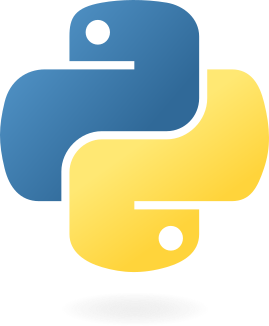

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Drop rows with missing values in relevant columns
model_df = england_filtered_clean[['ATT8SCR', 'PTFSM6CLA1A', 'RELCHAR']].dropna().copy()

# Log-transform numeric variables
model_df['log_ATT8SCR'] = np.log(model_df['ATT8SCR'].astype(float))
model_df['log_PTFSM6CLA1A'] = np.log(model_df['PTFSM6CLA1A'].astype(float))

# Ensure RELCHAR is treated as categorical
model_df['RELCHAR'] = model_df['RELCHAR'].astype('category')

# Create design matrix with dummy variables for RELCHAR
X = pd.get_dummies(model_df[['log_PTFSM6CLA1A', 'RELCHAR']], drop_first=True)

# Add constant
X = sm.add_constant(X)

# Response variable
y = model_df['log_ATT8SCR']

# Ensure all columns are float64 to avoid dtype issues
X = X.astype('float64')
y = y.astype('float64')

# Fit linear model using Pandas DataFrame directly
model = sm.OLS(y, X).fit()

# Display summary with proper variable names
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            log_ATT8SCR   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     99.29
Date:                Sat, 25 Oct 2025   Prob (F-statistic):          3.44e-213
Time:                        15:10:22   Log-Likelihood:                 1138.8
No. Observations:                1868   AIC:                            -2248.
Df Residuals:                    1853   BIC:                            -2165.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

You will notice that the religious character variables nearly all
insignificant. As such, lets try collapsing into three groups - “None”,
“Christian” and “Non-Christian”

### 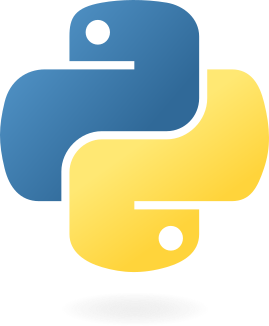

In [ ]:
# Define mapping function
def classify_relchar(value):
    if pd.isna(value):
        return "None"
    elif value in ["Does not apply", "None"]:
        return "None"
    elif value in [
        "Roman Catholic", "Greek Orthodox", "Church of England", "Catholic", "Christian",
        "Church of England/Roman Catholic", "Roman Catholic/Church of England",
        "Church of England/Christian", "Anglican/Church of England"
    ]:
        return "Christian"
    else:
        return "Non-Christian"

# Apply classification
england_filtered_clean['RELCHAR_Grp'] = england_filtered_clean['RELCHAR'].apply(classify_relchar)

Now re-run your model

### 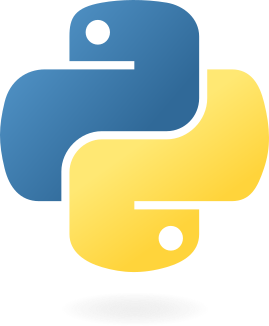

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Convert RELCHAR_Grp to a categorical variable with "None" as the reference level
england_filtered_clean['RELCHAR_Grp'] = pd.Categorical(
    england_filtered_clean['RELCHAR_Grp'],
    categories=["None", "Christian", "Non-Christian"],
    ordered=False
)

# Drop rows with missing values in relevant columns
model_df = england_filtered_clean[['ATT8SCR', 'PTFSM6CLA1A', 'RELCHAR_Grp']].dropna().copy()

# Log-transform numeric variables
model_df['log_ATT8SCR'] = np.log(model_df['ATT8SCR'].astype(float))
model_df['log_PTFSM6CLA1A'] = np.log(model_df['PTFSM6CLA1A'].astype(float))

# Ensure RELCHAR is treated as categorical
model_df['RELCHAR_Grp'] = model_df['RELCHAR_Grp'].astype('category')

# Create design matrix with dummy variables for RELCHAR
X = pd.get_dummies(model_df[['log_PTFSM6CLA1A', 'RELCHAR_Grp']], drop_first=True)

# Add constant
X = sm.add_constant(X)

# Response variable
y = model_df['log_ATT8SCR']

# Ensure all columns are float64 to avoid dtype issues
X = X.astype('float64')
y = y.astype('float64')

# Fit linear model using Pandas DataFrame directly
model = sm.OLS(y, X).fit()

# Display summary with proper variable names
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            log_ATT8SCR   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     912.1
Date:                Sat, 25 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:10:22   Log-Likelihood:                 1701.5
No. Observations:                2968   AIC:                            -3395.
Df Residuals:                    2964   BIC:                            -3371.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Has this made a difference? What’s happened to the significance of the
religious character variable?

> **Tip**
>
> You can use this method to reclassify any different variable.
>
> Think about how you might reclassify a continuous variable. You might
> think about converting something like ‘total number of pupils on roll’
> into ‘small’, ‘medium’ and ‘large’ schools, for example, based on
> certain thresholds. How might you choose these thresholds? If you are
> struggling to think of how you might code this kind of
> reclassification up, this is exactly where AI can be very helpful in
> assisting you - although while it might be good at the code to do it,
> I can guarantee it will likely be pretty bad at deciding on useful
> breaks in your data, so this is where you might need to intervene.

## Task 3 - Building your optimum multiple regression model

### Recipe Steps

-   Using the steps you learned last week and the information from this
    week’s lecture, I would like you to find the best possible
    ***7-dependent variable model*** for your chosen attainment variable
    (without interaction terms). These can be continuous or categorical
    variables or any combination of them. Remember:
    -   Use exploratory analysis to check the distributions of your
        variables using histograms, box plots etc. or binary scatter
        plots with your dependent variable, ***before*** putting them
        into your model (you’ve already done some of this, but you may
        need to do some more)
    -   you might run into issues with logging some variables that have
        real 0s in them - this might cause your model to break. You
        might need to filter these variables out of your dataset before
        running your model. Some of the code above will help with this -
        if you get stuck, ask a friendly AI for help
    -   with your dummy variables, you might want to experiment with
        changing your reference category
    -   you might also want to reclassify a variable if you suspect it
        is important, but that in its present form is coming out as
        insignificant
    -   check you regression assumptions - linearity, homoscedasticity,
        normality of residuals, multicollinearity, independence of
        residuals - does your model pass?
    -   which are the most important variables in your model in terms of
        t-values?
-   You should try and build your model step by step, a variable at a
    time. Each time you run the model, check what is happening to the
    coefficients
    -   What do you notice about confounding or mediation as you go?
    -   Do any of your variables become insignificant? For example, what
        happens to religious character groups in the presence of
        regions, for example? If a variable becomes insignificant, you
        might we wise to drop it from the analysis (but maybe not until
        the end in case another variable makes it significant again)

#### ON YOUR MARKS, GET SET - GO!!!

When you think you have your best model, move on to Task 4 below

### 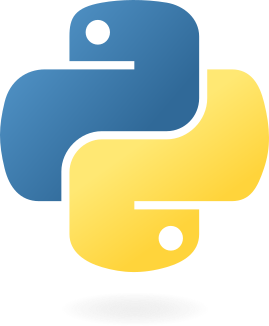

## Task 4 - Evaluation

-   When you have your ‘best’ model, how do you interpret the
    coefficients?
    -   Which variable(s) has(have) the most explanatory power (check
        t-values for this)?
    -   How do you interpret the combined explanatory power of variables
        in your model?
    -   What kind of confounding do you observe as you add more
        variables (if any)?
    -   Do you have any issues of multicollinearity or residual
        independence? Does your model pass the standard tests?

Here’s my best model compared with some of the others I built as I went
along

In [ ]:
names(coef(england_model3))

[1] "(Intercept)"              "log(PTFSM6CLA1A)"        
[3] "log(PERCTOT)"             "RELCHAR_GrpChristian"    
[5] "RELCHAR_GrpNon-Christian"

In [ ]:
library(jtools)

export_summs(
  england_model3, england_model4, england_model5, england_model6, england_model7, 
  robust = "HC3",
  coefs = coef_names
)

Warning in knit_print.huxtable(x, ...): Unrecognized output format "ipynb". Using `to_screen` to print huxtables.
Set options("huxtable.knitr_output_format") manually to "latex", "html", "rtf", "docx", "pptx", "md", "typst" or "screen".

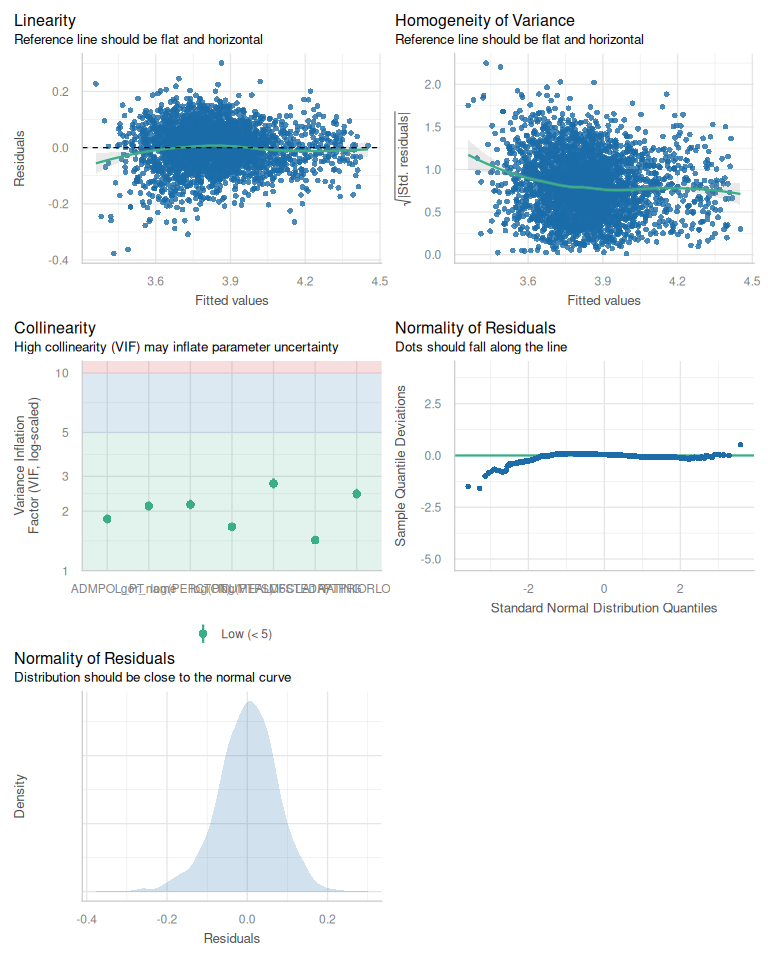

In [ ]:
check_model(england_model7)

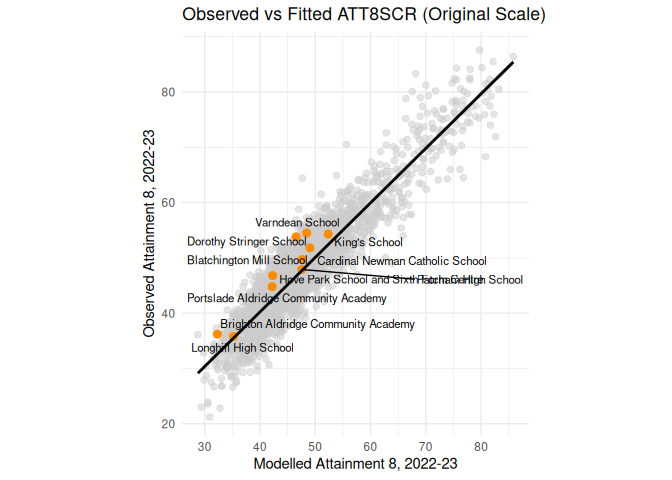

In [ ]:
library(tidyverse)
library(ggrepel)

# Convert fitted values back to original scale
england_filtered_clean <- england_filtered_clean %>%
  mutate(
    fitted_original = exp(fitted7),
    highlight = LANAME == "Brighton and Hove",
    label = if_else(highlight, SCHNAME.x, NA_character_)
  )

# Scatter plot with layered points and full-model fit line
ggplot(england_filtered_clean, aes(x = fitted_original, y = ATT8SCR)) +
  # All schools in grey
  geom_point(color = "grey80", alpha = 0.5, size = 2) +

  # Brighton and Hove schools in orange
  geom_point(data = filter(england_filtered_clean, highlight),
             aes(x = fitted_original, y = ATT8SCR),
             color = "darkorange", size = 2.5) +

  # Labels for Brighton and Hove schools
  geom_text_repel(data = filter(england_filtered_clean, highlight),
                  aes(label = label),
                  size = 3, max.overlaps = 20) +

  # Line of best fit for all schools
  geom_smooth(method = "lm", se = TRUE, color = "black") +
  
# Mirror x and y axes
  coord_equal() +


  theme_minimal() +
  labs(
    title = "Observed vs Fitted ATT8SCR (Original Scale)",
    x = "Modelled Attainment 8, 2022-23",
    y = "Observed Attainment 8, 2022-23"
  )

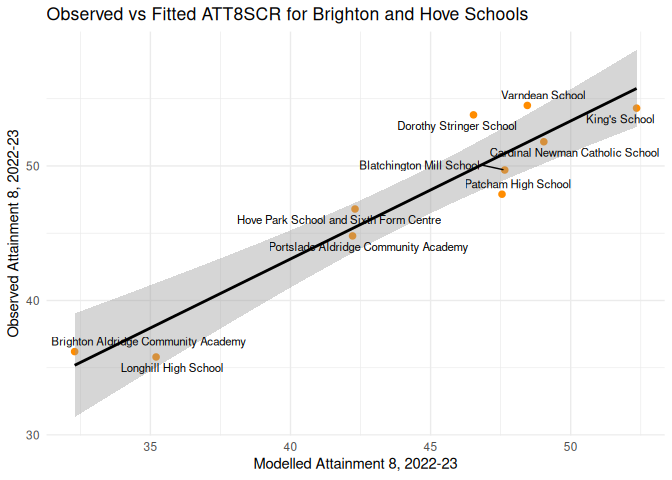

In [ ]:
# Filter for Brighton and Hove only
brighton_data <- england_filtered_clean %>%
  filter(LANAME == "Brighton and Hove")

# Plot with regression line
ggplot(brighton_data, aes(x = fitted_original, y = ATT8SCR)) +
  geom_point(color = "darkorange", size = 2) +
  geom_smooth(method = "lm", se = TRUE, color = "black") +
  geom_text_repel(aes(label = SCHNAME.x), max.overlaps = 20, size = 3) +
  theme_minimal() +
  labs(
    title = "Observed vs Fitted ATT8SCR for Brighton and Hove Schools",
    x = "Modelled Attainment 8, 2022-23",
    y = "Observed Attainment 8, 2022-23"
  )

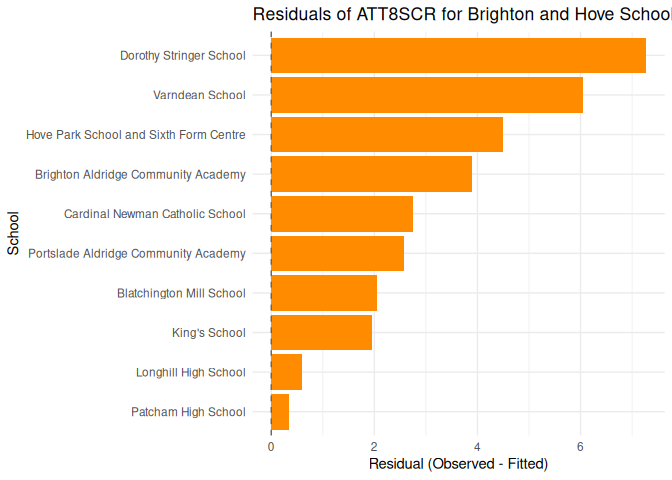

In [ ]:
library(tidyverse)

# Calculate residuals and filter for Brighton and Hove
brighton_residuals <- england_filtered_clean %>%
  filter(LANAME == "Brighton and Hove") %>%
  mutate(
    fitted_original = exp(fitted7),
    residual = ATT8SCR - fitted_original,
    abs_residual = abs(residual)
  )

# Create a bar plot centered on zero
ggplot(brighton_residuals, aes(x = reorder(SCHNAME.x, residual), y = residual)) +
  geom_col(fill = "darkorange") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "grey40") +
  coord_flip() +
  theme_minimal() +
  labs(
    title = "Residuals of ATT8SCR for Brighton and Hove Schools",
    x = "School",
    y = "Residual (Observed - Fitted)"
  )

## Task 5 - Interacting Variables

In the lecture, you saw how we could

Task 2b - AI interpretation. Yes, we’re using AI to help us!